# 导入需要的库

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# 模型封装

In [6]:
class RandomWalk(object):
    '''
    steps: number of steps to simulate
    x: list of x coordinates
    y: list of y coordinates
    distances: list of distances from origin
    returns: list of number of returns to origin
    first_return: index of first return to origin
    '''

    def __init__(self, steps=1000):
        self.steps = steps
        self.x = [0]
        self.y = [0]
        self.distances = [0]
        self.returns = [0]
        self.first_return = -1

    # Simulate a random walk
    def simulate(self, bias=None, directions=None, weight=[0.25,0.25,0.25,0.25]):
        '''
        bias: list of bias for each step, or None for no bias
        directions: list of directions for each step, or 'random' for random directions, or None for 4 directions
        weight: list of weights for each direction, or None for equal weights
        '''
        for i in range(1, self.steps):
            if directions:  # if directions is not None
                if directions == 'random':  # if directions is 'random'
                    # generate a random angle
                    angle = random.uniform(0, 2*math.pi)
                    # convert angle to direction
                    direction = (math.cos(angle), math.sin(angle))
                else:  # if directions is a list, choose a direction from the list
                    direction = random.choices(directions, weight)[0]
            
            else: # if directions is None, choose a direction from [(1, 0), (-1, 0), (0, 1), (0, -1)]
                direction = random.choices(
                    [(1, 0), (-1, 0), (0, 1), (0, -1)], weight)[0]
            if bias: # if bias is not None, add bias to the direction
                x, y = self.x[-1] + direction[0] * (bias[i-1] if i-1 < len(
                    bias) else 1), self.y[-1] + direction[1] * (bias[i-1] if i-1 < len(bias) else 1)
            else: # if bias is None, do not add bias to the direction
                x, y = self.x[-1] + direction[0], self.y[-1] + direction[1]
            self.x.append(x)
            self.y.append(y)
            distance = math.sqrt(x**2 + y**2)
            self.distances.append(distance)
            # if the random walk returns to origin, append 1 to self.returns
            if abs(x) < 1e-6 and abs(y) < 1e-6:
                self.returns.append(self.returns[-1] + 1)
            else:
                self.returns.append(self.returns[-1])

        for i in range(len(self.returns)):
            if self.returns[i] == 1: # if the random walk returns to origin for the first time, set first_return to the index
                self.first_return = i+1
                break
        if self.first_return == -1: # if the random walk never returns to origin, set first_return to None
            self.first_return == None


In [3]:
class ExpectedRandomWalk(object):
    '''
    num: number of simulations
    steps: number of steps to simulate
    distances: list of distances from origin
    returns: list of number of returns to origin
    first_return: index of first return to origin
    '''

    def __init__(self, num, steps):
        self.num = num
        self.distances = np.zeros([1, steps])
        self.returns = np.zeros([1, steps])
        self.steps = steps
        self.first_return = -1

    def simulate(self, bias=None, directions=None, weight=[0.25,0.25,0.25,0.25]):
        '''
        bias: list of bias for each step, or None for no bias
        directions: list of directions for each step, or 'random' for random directions, or None for 4 directions
        weight: list of weights for each direction, or None for equal weights
        '''
        k = self.num
        # Simulate num random walks
        for i in range(self.num):
            model = RandomWalk(self.steps)
            model.simulate(bias, directions, weight)
            self.distances += np.array(model.distances)
            self.returns += np.array(model.returns)
            if model.first_return != None:
                self.first_return += model.first_return
                k -= 1
        self.distances = self.distances / self.num
        self.returns = self.returns / self.num
        self.first_return = self.first_return / (self.num - k)

    # Plot the random walk
    def plot_distances(self):
        x_values = np.arange(10,self.steps)
        y_values = np.reshape(self.distances[:,10:], (self.steps-10,))

        plt.figure(dpi=150)
        plt.plot(x_values, y_values, c='r')
        plt.title("Distance from Origin")
        plt.xlabel("Number of Steps")
        plt.ylabel("Expected Distance")
        plt.show()

    # Plot the number of returns to origin
    def plot_returns(self):
        x_values = np.arange(10,self.steps)
        y_values = np.reshape(self.returns[:,10:], (self.steps-10,))

        plt.figure(dpi=150)
        plt.plot(x_values, y_values)
        plt.title("Return to Origin")
        plt.xlabel("Number of Steps")
        plt.ylabel("Expected Number of Returns")
        plt.show()


# 基本要求

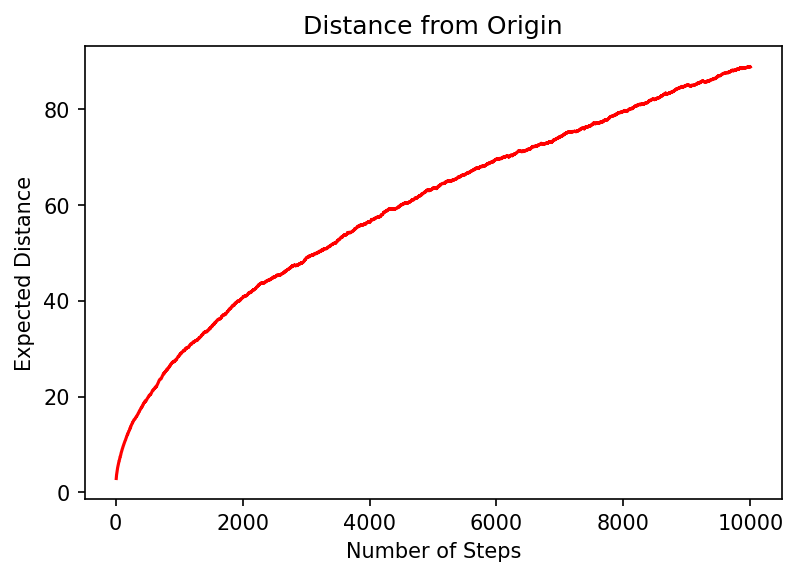

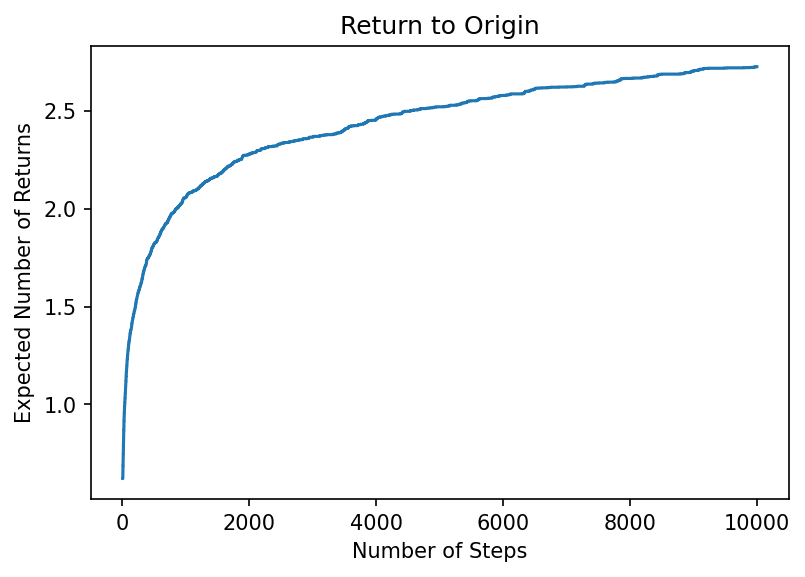

Expected first-return time: 264.379


In [14]:
# Simulate a random walk
walk = ExpectedRandomWalk(1000, 10000)
walk.simulate(weight=[0.25,0.25,0.25,0.25])
walk.plot_distances()
walk.plot_returns()
print(f"Expected first-return time: {walk.first_return}")

# 扩展要求

## 有偏随机游走

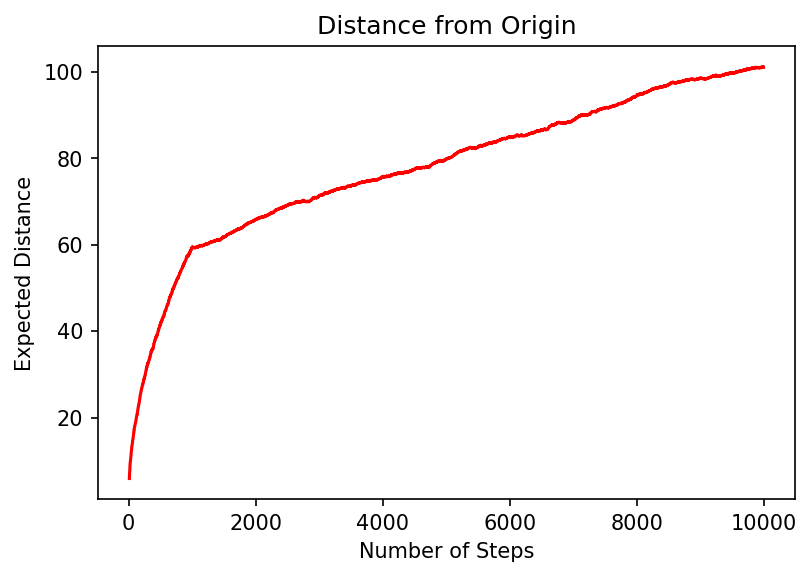

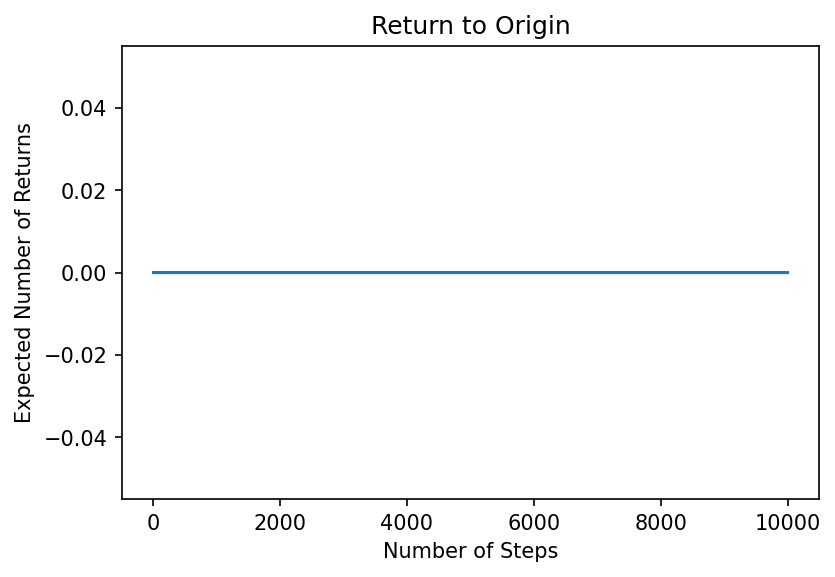

The random walk never returns to origin


In [7]:
# 拓展要求：模拟10000步游走过程，计算期望距离和期望回到原点次数，绘制距离曲线和回到原点次数曲线
# 有偏随机游走，每一步步长随机，平均值为2
bias = [random.uniform(1, 3) for i in range(1000)]

walk = ExpectedRandomWalk(1000, 10000)
walk.simulate(bias)
walk.plot_distances()
walk.plot_returns()
if walk.first_return > 0:
    print(f"Expected first-return time: {walk.first_return}")
else:
    print("The random walk never returns to origin")

## 以不同概率选择不同方向

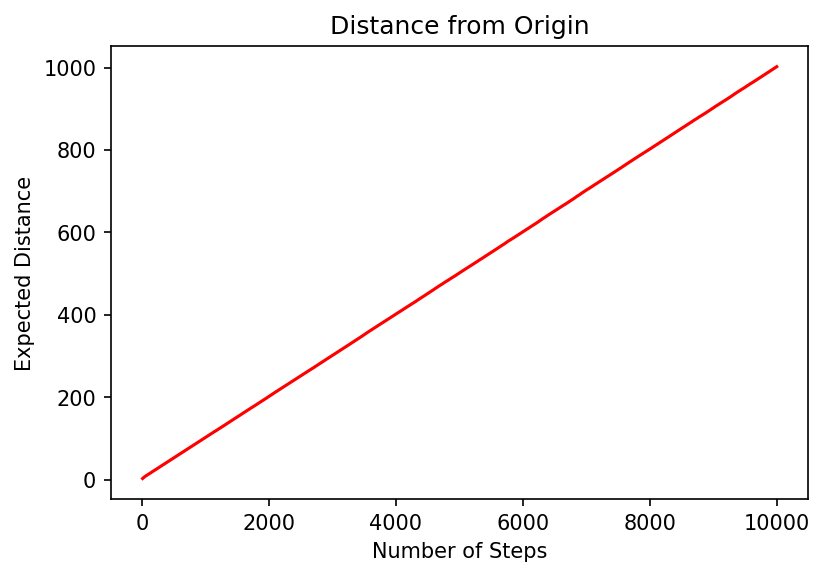

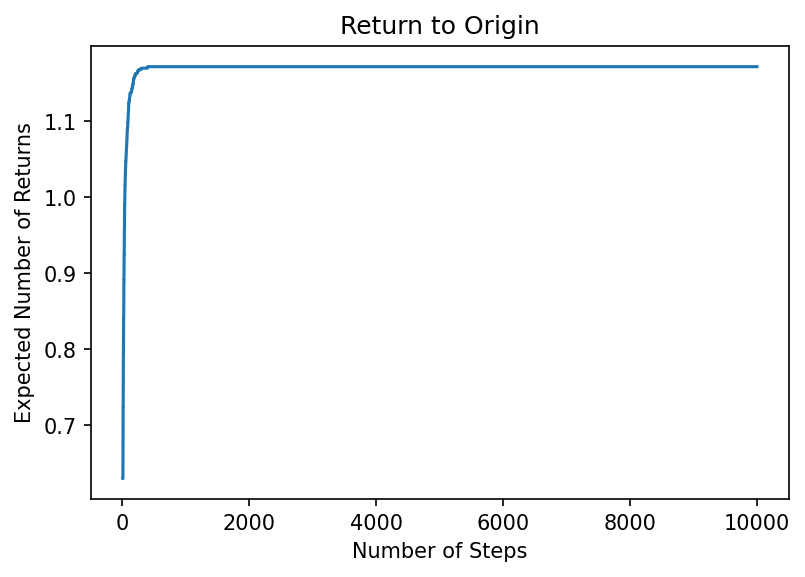

Expected first-return time: 6.647


In [10]:
# 以不同的概率选择不同方向模拟随机游走，选择方向的概率分别为0.3,0.2,0.25,0.25
walk = ExpectedRandomWalk(1000, 10000)
walk.simulate(weight=[0.3,0.2,0.25,0.25])
walk.plot_distances()
walk.plot_returns()
print(f"Expected first-return time: {walk.first_return}")

## 不局限于上下左右，可以选择其他方向

### 以对角线为方向

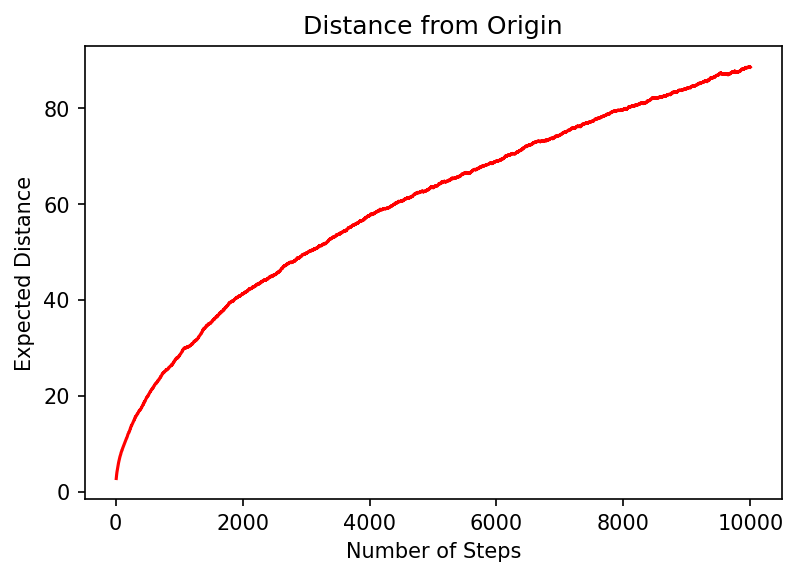

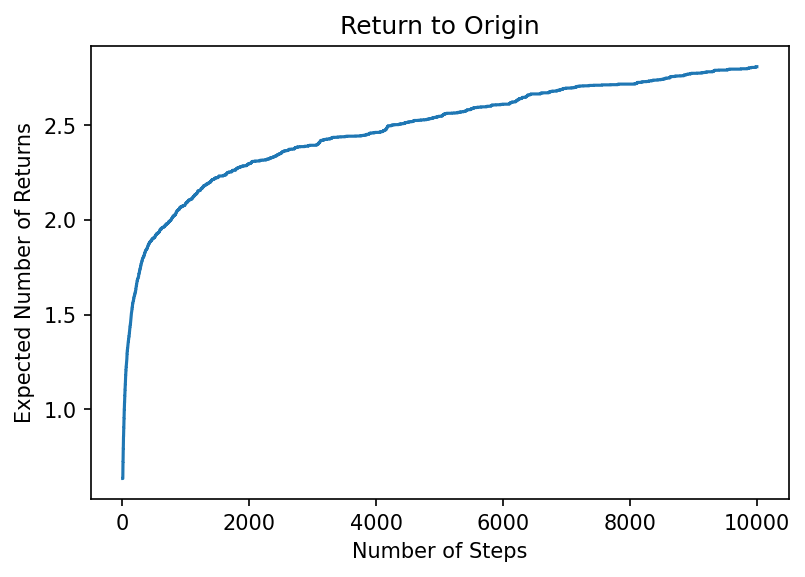

Expected first-return time: 245.575


In [8]:
# 方向为对角线
walk = ExpectedRandomWalk(1000, 10000)
walk.simulate(directions=[(1/np.sqrt(2),1/np.sqrt(2)),(-1/np.sqrt(2),1/np.sqrt(2)),(1/np.sqrt(2),-1/np.sqrt(2)),(-1/np.sqrt(2),-1/np.sqrt(2))])
walk.plot_distances()
walk.plot_returns()
if walk.first_return > 0:
    print(f"Expected first-return time: {walk.first_return}")
else:
    print("The random walk never returns to origin")

### 随机方向

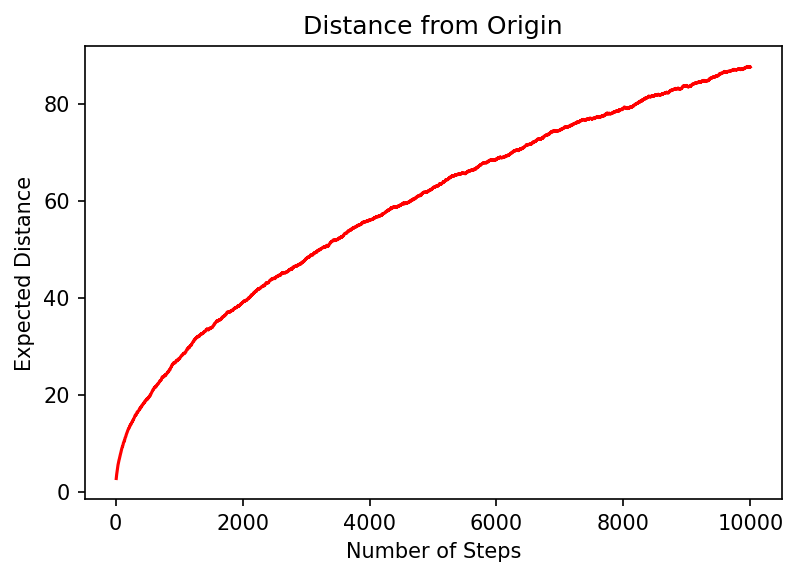

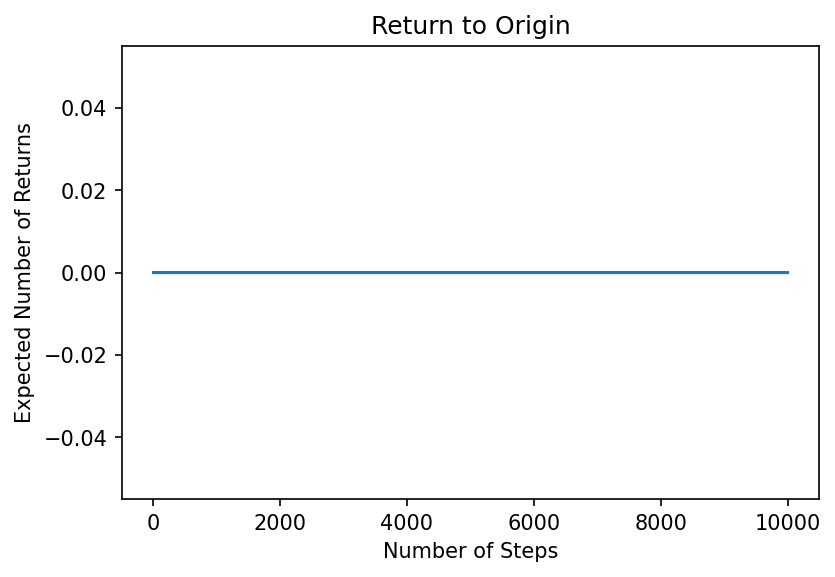

The random walk never returns to origin


In [9]:
walk = ExpectedRandomWalk(1000, 10000)
walk.simulate(directions='random')
walk.plot_distances()
walk.plot_returns()
if walk.first_return > 0:
    print(f"Expected first-return time: {walk.first_return}")
else:
    print("The random walk never returns to origin")